In [19]:
#English Premier League 2024/25 - Player & Team Performance Analysis
##To help clubs, sponsors, and fantasy football managers gain deep insights into EPL team and player performance for the 2024/25 season.

In [20]:
##Importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sbn
%matplotlib inline

In [21]:
#Loading both datasets
player_df = pd.read_csv("epl_player_stats_24_25.csv")
team_df= pd.read_csv("premier_league_stats_2024-25.csv") 
player_df, team_df

(         Player Name                     Club Nationality Position  \
 0          Ben White                  Arsenal     England      DEF   
 1        Bukayo Saka                  Arsenal     England      MID   
 2         David Raya                  Arsenal       Spain      GKP   
 3        Declan Rice                  Arsenal     England      MID   
 4      Ethan Nwaneri                  Arsenal     England      MID   
 ..               ...                      ...         ...      ...   
 557   Santiago Bueno  Wolverhampton Wanderers     Uruguay      DEF   
 558         Tom King  Wolverhampton Wanderers       Wales      GKP   
 559      Tommy Doyle  Wolverhampton Wanderers     England      MID   
 560       Toti Gomes  Wolverhampton Wanderers    Portugal      DEF   
 561  Yerson Mosquera  Wolverhampton Wanderers    Colombia      DEF   
 
      Appearances  Minutes  Goals  Assists  Shots  Shots On Target  ... Fouls  \
 0             17     1198      0        2      9               1

In [22]:
#Standardizing column names
team_df['Club'] = team_df['Club'].str.strip().str.lower()
player_df['Club'] = player_df['Club'].str.strip().str.lower()

In [23]:
#Merging the dataframes
combined_df= player_df.merge(team_df, on ="Club", how="left")
combined_df.head()

,Player Name,Club,Nationality,Position,Appearances,Minutes,Goals,Assists,Shots,Shots On Target,...,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes
0,Ben White,arsenal,England,DEF,17,1198,0,2,9,12,...,74.0,1.95,59.9,34.4,25.5,0.67,60251.0,Kai Havertz - 9,David Raya,→ Champions League via league finish
1,Bukayo Saka,arsenal,England,MID,25,1735,6,10,67,2,...,74.0,1.95,59.9,34.4,25.5,0.67,60251.0,Kai Havertz - 9,David Raya,→ Champions League via league finish
2,David Raya,arsenal,Spain,GKP,38,3420,0,0,0,0,...,74.0,1.95,59.9,34.4,25.5,0.67,60251.0,Kai Havertz - 9,David Raya,→ Champions League via league finish
3,Declan Rice,arsenal,England,MID,35,2833,4,7,48,18,...,74.0,1.95,59.9,34.4,25.5,0.67,60251.0,Kai Havertz - 9,David Raya,→ Champions League via league finish
4,Ethan Nwaneri,arsenal,England,MID,26,889,4,0,24,0,...,74.0,1.95,59.9,34.4,25.5,0.67,60251.0,Kai Havertz - 9,David Raya,→ Champions League via league finish


In [24]:
#Checking na values
combined_df.isna().sum()

Player Name          0
Club                 0
Nationality          0
Position             0
Appearances          0
                  ... 
xGD/90             195
Attendance         195
Top Team Scorer    195
Goalkeeper         195
Notes              306
Length: 75, dtype: int64

In [25]:
unmatched = combined_df[combined_df['xGD/90'].isnull()]
print(unmatched['Club'].unique())


['brighton & hove albion' 'manchester united' 'newcastle united'
 'nottingham forest' 'tottenham hotspur' 'west ham united'
 'wolverhampton wanderers']


In [26]:
print(team_df['Club'])

0           liverpool
1             arsenal
2     manchester city
3             chelsea
4       newcastle utd
5         aston villa
6     nott'ham forest
7            brighton
8         bournemouth
9           brentford
10             fulham
11     crystal palace
12            everton
13           west ham
14     manchester utd
15             wolves
16          tottenham
17     leicester city
18       ipswich town
19        southampton
Name: Club, dtype: object


In [27]:
print(player_df['Club'].unique())

['arsenal' 'aston villa' 'bournemouth' 'brentford' 'brighton'
 'brighton & hove albion' 'chelsea' 'crystal palace' 'everton' 'fulham'
 'ipswich town' 'leicester city' 'liverpool' 'manchester city'
 'manchester united' 'newcastle united' 'nottingham forest' 'southampton'
 'tottenham hotspur' 'west ham united' 'wolverhampton wanderers']


In [28]:
#Team name mapping for better merging
team_name_mapping = {
    'Brighton': 'Brighton & Hove Albion',
    'Manchester Utd': 'Manchester United',
    'Newcastle Utd' : 'Newcastle United',
    "Nott'ham Forest" : 'Nottingham Forest',
    'Tottenham': 'Tottenham Hotspur' ,
    'West Ham': 'West Ham United',
    'Wolves' : 'Wolverhampton Wanderers'
}

team_df['Club'] = team_df['Club'].replace(team_name_mapping)


In [29]:
#Merging the 2 datasets 
combined_df = player_df.merge(team_df, on='Club', how='left')

In [30]:
combined_df[combined_df['xGD/90'].isnull()][['Player Name', 'Club']]

,Player Name,Club
111,Adam Webster,brighton & hove albion
112,Bart Verbruggen,brighton & hove albion
113,Billy Gilmour,brighton & hove albion
114,Brajan Gruda,brighton & hove albion
115,Carlos Baleba,brighton & hove albion
...,...,...
557,Santiago Bueno,wolverhampton wanderers
558,Tom King,wolverhampton wanderers
559,Tommy Doyle,wolverhampton wanderers
560,Toti Gomes,wolverhampton wanderers


In [31]:
team_name_mapping = {
    'Brighton': 'Brighton & Hove Albion' }
player_df['Club'] = player_df['Club'].replace(team_name_mapping)
combined_df = player_df.merge(team_df, on='Club', how='left')

In [32]:
combined_df[combined_df['xGD/90'].isnull()][['Player Name', 'Club']]

,Player Name,Club
111,Adam Webster,brighton & hove albion
112,Bart Verbruggen,brighton & hove albion
113,Billy Gilmour,brighton & hove albion
114,Brajan Gruda,brighton & hove albion
115,Carlos Baleba,brighton & hove albion
...,...,...
557,Santiago Bueno,wolverhampton wanderers
558,Tom King,wolverhampton wanderers
559,Tommy Doyle,wolverhampton wanderers
560,Toti Gomes,wolverhampton wanderers


In [33]:
#Creating new columns
combined_df['mins_per_match']= (combined_df['Minutes']/combined_df['Appearances']).astype(int)
combined_df['goals_per_match']= (combined_df['Goals']/combined_df['Appearances']).astype(float)
combined_df['mins_per_match'], combined_df['goals_per_match']

(0      70
 1      69
 2      90
 3      80
 4      34
        ..
 557    58
 558     1
 559    19
 560    84
 561    88
 Name: mins_per_match, Length: 562, dtype: int64,
 0      0.000000
 1      0.240000
 2      0.000000
 3      0.114286
 4      0.153846
          ...   
 557    0.000000
 558    0.000000
 559    0.000000
 560    0.000000
 561    0.000000
 Name: goals_per_match, Length: 562, dtype: float64)

In [34]:
#Number of Different Nations where the Players are from
ntnl= np.size((player_df['Nationality'].unique()))
ntnl

64

In [35]:
#Goal Conversion Rate
Total_goals= combined_df['Goals'].sum()
gcr= (Total_goals*100/combined_df["Shots"].sum())
print(gcr, "%")

9.776649746192893 %


<Axes: >

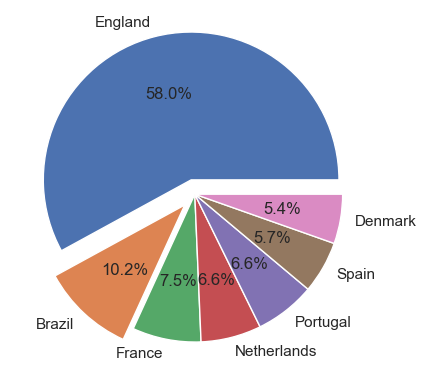

In [36]:
# Pie Chart of Most Players are from which Nations
max_ntnl= player_df.groupby('Nationality').size().sort_values(ascending= False)
max_ntnl.head(7).plot(kind='pie', autopct="%1.1f%%", explode=(0.1, 0.1, 0.0, 0.0,0.0,0.0,0.0), color= sbn.color_palette("coolwarm"))

### Maximum players are from England(58.0%) followed by Brazil(10.2%) and other nations

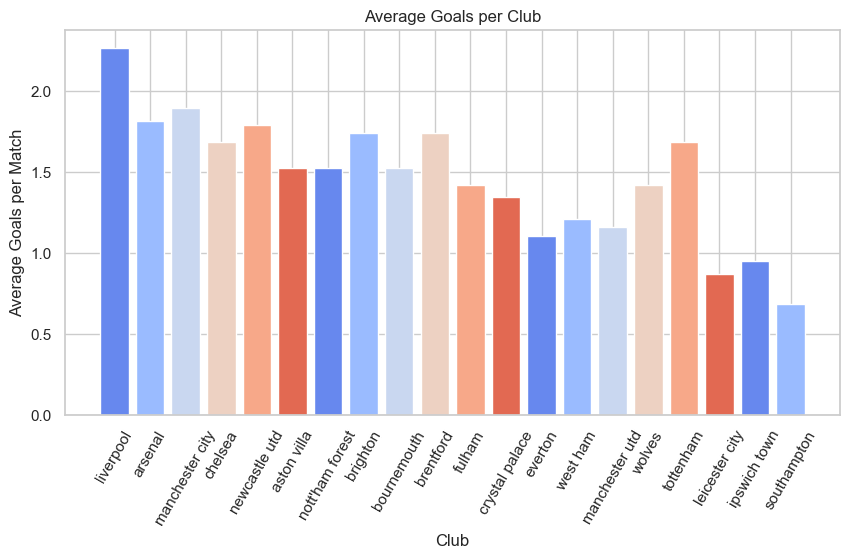

In [37]:
#Bar Graph of Average Goals per Match by each Club
team_df['Avg_goals']= (team_df['GF']/team_df['MP'])
team_df[['Avg_goals', 'Club']].head(5)

mpl.figure(figsize=(10,5))
mpl.bar(team_df['Club'], team_df['Avg_goals'], color= sbn.color_palette("coolwarm"))
mpl.xlabel('Club')
mpl.ylabel('Average Goals per Match')
mpl.xticks(rotation=60)
mpl.title('Average Goals per Club')
mpl.show()

###this clearly shows Liverpool scored maxium goals per match on an average followed by Manchester city.

In [38]:
# Top 10 Assists by Players
top_assists= combined_df[["Player Name", "Club", "Assists","Goals"]].nlargest(n=10, columns="Assists")
top_assists

### this states that Mohamed Salah gave maximum number of assists(18) followed by Jacob Murphy(12) and other top 10 players.

,Player Name,Club,Assists,Goals
324,Mohamed Salah,liverpool,18,29
399,Jacob Murphy,newcastle united,12,8
415,Anthony Elanga,nottingham forest,11,6
1,Bukayo Saka,arsenal,10,6
45,Morgan Rogers,aston villa,10,8
99,Mikkel Damsgaard,brentford,10,2
222,Antonee Robinson,fulham,10,0
367,Bruno Fernandes,manchester united,10,8
497,Son Heung-Min,tottenham hotspur,9,7
14,Martin Ødegaard,arsenal,8,3


<Figure size 500x500 with 0 Axes>

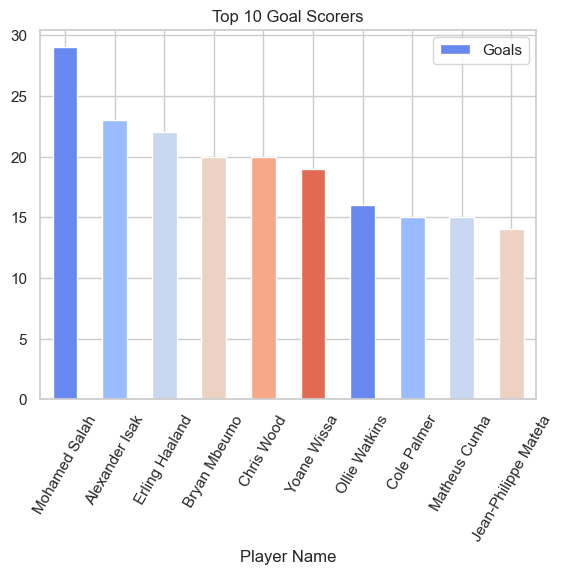

In [39]:
#Top 10 Toal Scorers
top_goals= combined_df[["Player Name", "Goals","Appearances"]].nlargest(n=10, columns="Goals")
mpl.figure(figsize=(5,5))
top_goals.plot(kind="bar", x= "Player Name", y="Goals", color= sbn.color_palette("coolwarm"))
mpl.xticks(rotation=60)
mpl.title('Top 10 Goal Scorers')
mpl.show()

##this shows Mohamed Salah was the top goal scorer of the season followed by other top 10 players as depicted.

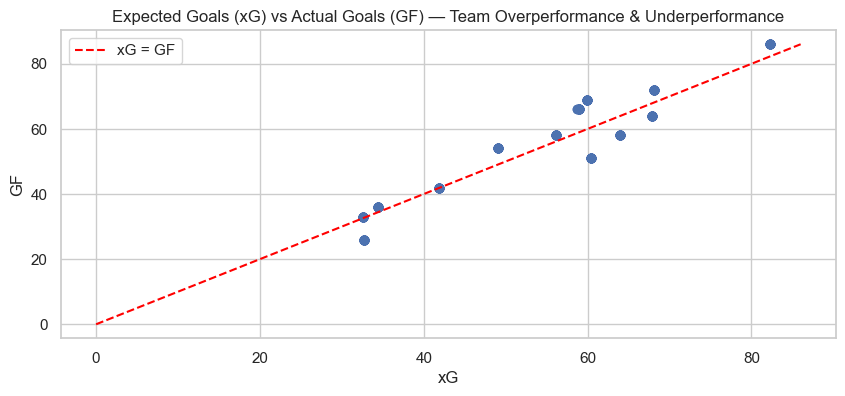

In [40]:
#Scatter plot showing Expected vs Actual Goals Scored (Performance Efficiency)
mpl.figure(figsize=(10,4))
mpl.scatter(combined_df['xG'], combined_df['GF'])
max_val = max(combined_df['xG'].max(), combined_df['GF'].max())
mpl.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='xG = GF')
mpl.legend()
sbn.color_palette("coolwarm")
mpl.xlabel('xG')
mpl.ylabel('GF')
mpl.title('Expected Goals (xG) vs Actual Goals (GF) — Team Overperformance & Underperformance')
mpl.show()

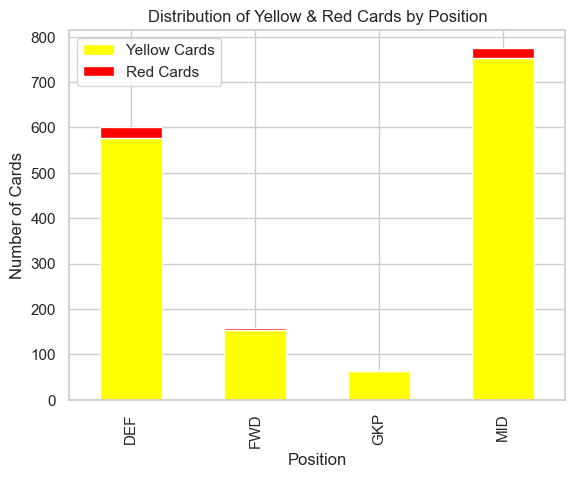

In [41]:
#Distribution of Yellow & Red Cards by Position
cards_no = combined_df.groupby('Position')[['Yellow Cards', 'Red Cards']].sum()
cards_no.plot(kind='bar', stacked=True, color=['yellow', 'red'])
mpl.ylabel('Number of Cards')
mpl.title('Distribution of Yellow & Red Cards by Position')
mpl.show()

### hence maximum yellow cards have been given to Midfielders and then defenders, and maximum red cards are given to midfielders and defenders. 
###Therefore, it can be concluded that midfielders and denfenders are most aggressive whereas goalkeepers and forwards have been much more disciplined.

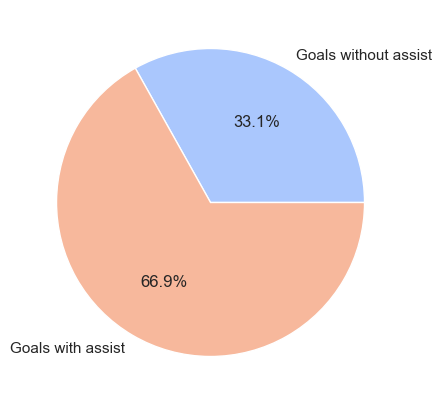

In [42]:
#Pie chart of Goals scored with and without Assist
mpl.figure(figsize=(5,5))
assists = combined_df["Assists"].sum()
data = [combined_df["Goals"].sum() - assists, assists]
mpl.pie(data, labels=['Goals without assist', 'Goals with assist'], colors=sbn.color_palette("coolwarm", 2), autopct="%1.1f%%")
mpl.show()

###this shows that a large proportion of goals(66.9%) happen with assist

<Figure size 500x500 with 0 Axes>

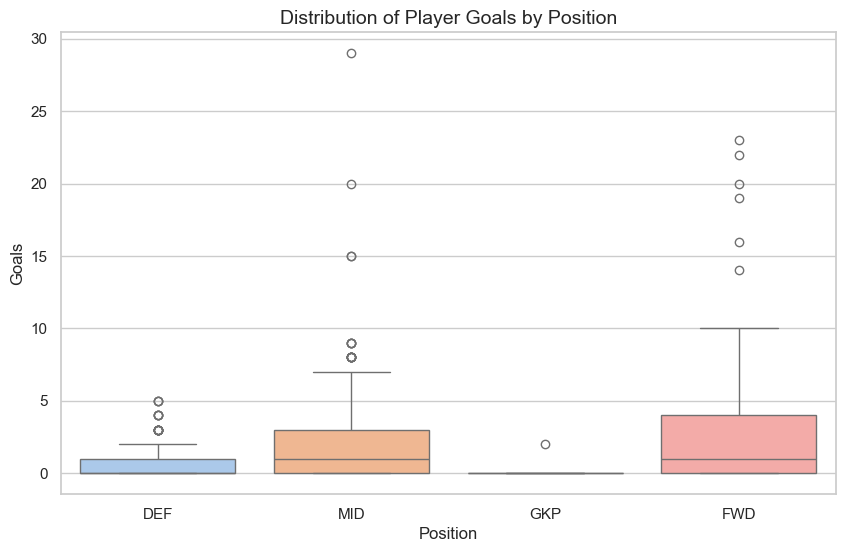

In [43]:
#Boxplot of Distribution of Goals Scored by Player Positions
mpl.figure(figsize=(5, 5))
sbn.set(style="whitegrid")

mpl.figure(figsize=(10, 6))
sbn.boxplot(data=combined_df, x='Position', y='Goals', hue='Position', palette='pastel', legend=False )
mpl.title('Distribution of Player Goals by Position', fontsize=14)
mpl.xlabel('Position')
mpl.ylabel('Goals')

mpl.show()

###from the Boxplot it is clear that Forwards clearly dominate in goal-scoring, but some midfielders contribute heavily as well

In [44]:
##Data Quality Check
player_df.isnull().sum()
team_df.isnull().sum()


Rk                  0
Club                0
MP                  0
W                   0
D                   0
L                   0
GF                  0
GA                  0
GD                  0
Pts                 0
Pts/MP              0
xG                  0
xGA                 0
xGD                 0
xGD/90              0
Attendance          0
Top Team Scorer     0
Goalkeeper          0
Notes              10
Avg_goals           0
dtype: int64